## 1. Data Upload

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from scipy.optimize import minimize

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_features = iris.data
iris_labels = iris.target
iris_target_names = iris.target_names

## 2. Multi-dimensional scaling

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_features)

# Apply MDS to reduce the dimensions to 2
mds = MDS(n_components=2, normalized_stress='auto')
X_mds = mds.fit_transform(X_scaled)

# Apply t-SNE to reduce the dimensions to 2
# tsne = TSNE(n_components=2, random_state=42, n_iter=500)
# X_tsne = tsne.fit_transform(X_scaled)

# Convert the reduced data back to a pandas DataFrame
iris_reduced = pd.DataFrame(X_mds, columns=["x1", "x2"])
iris_reduced['labels'] = iris_labels


In [4]:
iris_reduced

,x1,x2,labels
0,0.897639,-2.149489,0
1,1.760325,-1.323444,0
2,1.637525,-1.758911,0
3,1.818587,-1.560065,0
4,0.838071,-2.348142,0
...,...,...,...
145,-1.437303,1.318175,2
146,-0.131065,1.832584,2
147,-1.102036,1.101844,2
148,-1.874119,0.328070,2


## 3. Visual analytics

In [5]:
def interpolate_coordinates(x_1, x_n, n):
    """
    This function calculates the values of the interpolate_coordinates
    of a line based on its first and last coordinates.
    :param x_1:
    :param x_n:
    :param n:
    :return:
    """
    # Ensure n is greater than 1 to avoid division by zero
    if n <= 1:
        raise ValueError("n must be greater than 1 to calculate intermediate points.")

    # List to hold all the coordinates including the first and the last
    inter_coordinates = []

    # Calculate each intermediate coordinate
    for i in range(0, n):
        x_i = x_1 + ((x_n - x_1) * i) / (n - 1)
        inter_coordinates.append(x_i)

    return inter_coordinates


In [6]:
x_1_first = 5
x_2_first = 0

x_1_last = -3
x_2_last = -1

# The number of intermediate points
num_inter_points = iris_features.shape[1]

x_1_inter_coordinates = interpolate_coordinates(x_1_first, x_1_last, num_inter_points)
x_2_inter_coordinates = interpolate_coordinates(x_2_first, x_2_last, num_inter_points)
# print(x_1_inter_coordinates)
# print(x_2_inter_coordinates)

# Create a DataFrame from the coordinates
coordinates_df = pd.DataFrame({'x1': x_1_inter_coordinates, 'x2': x_2_inter_coordinates})
coordinates_df


,x1,x2
0,5.000000,0.000000
1,2.333333,-0.333333
2,-0.333333,-0.666667
3,-3.000000,-1.000000


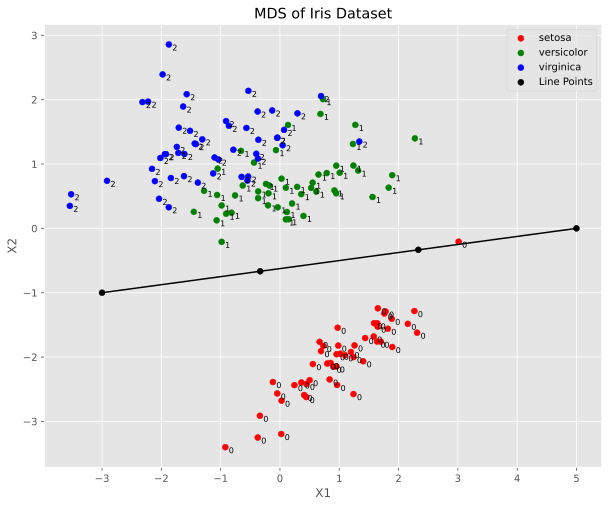

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%config InlineBackend.figure_format = 'svg' 
plt.style.use('ggplot')

NUM_TICKS = 1

# Define colors for each species
colors = ['red', 'green', 'blue']

# Plotting
plt.figure(figsize=(10, 8))

# Set tick frequency using MultipleLocator
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(NUM_TICKS))
ax.yaxis.set_major_locator(ticker.MultipleLocator(NUM_TICKS))

# Plot each species
for i, species in enumerate(iris_target_names):
    subset = iris_reduced[iris_reduced['labels'] == i]
    plt.scatter(subset['x1'], subset['x2'], color=colors[i], label=species)

    # Annotate each point with its class label
    for _, row in subset.iterrows():
        plt.annotate(str(i), (row['x1'], row['x2']), textcoords="offset points", xytext=(6, -6), ha='center', fontsize=8)

# Draw the separating line
line_x1 = coordinates_df['x1'].tolist()
line_x2 = coordinates_df['x2'].tolist()
plt.plot(line_x1, line_x2, 'k-')  # 'k-' for black line

# Highlight points on the separating line
# If coordinates_df contains these points, plot them with a distinct style
plt.scatter(line_x1, line_x2, color='k', marker='o', edgecolor='k', label='Line Points')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('MDS of Iris Dataset')
plt.legend()
plt.show()

## 4. Calculate Transition Matrix

### 3.1. Singular Value Decomposition (SVD)

In [8]:
# Receive values from the matrix A DataFrame 
formal_model_reduced_values = iris_reduced.drop('labels', axis=1).values

# Calculate SVD
U, s, Vt = np.linalg.svd(formal_model_reduced_values)

# Construct the full diagonal matrix
S = np.zeros(formal_model_reduced_values.shape)
for i in range(min(formal_model_reduced_values.shape)):
    S[i, i] = s[i]

# print("U:\n", U)
# print("\nS:\n", S)
# print("\nVt:\n", Vt)


In [9]:
formal_model_reduced_values

array([[ 0.89763936, -2.14948933],
       [ 1.76032475, -1.3234441 ],
       [ 1.63752509, -1.75891123],
       [ 1.81858716, -1.56006479],
       [ 0.83807094, -2.34814186],
       [-0.04552889, -2.56549241],
       [ 1.4034877 , -2.06537314],
       [ 1.09434556, -1.97219372],
       [ 2.26677627, -1.28491963],
       [ 1.64842298, -1.52784561],
       [ 0.3606291 , -2.3950694 ],
       [ 1.24049936, -2.00066019],
       [ 1.88462182, -1.40524686],
       [ 2.31270824, -1.62147665],
       [-0.33840148, -2.91242377],
       [-0.92129031, -3.40084495],
       [ 0.02703503, -2.67846467],
       [ 0.85245852, -2.09082813],
       [-0.11944763, -2.38811523],
       [ 0.40859969, -2.59001982],
       [ 0.73111778, -1.82732965],
       [ 0.50083999, -2.35896547],
       [ 1.23992723, -2.57531148],
       [ 0.97302825, -1.54467259],
       [ 1.19748933, -1.92160121],
       [ 1.65094916, -1.24242107],
       [ 0.98356013, -1.82193834],
       [ 0.79695641, -2.10113561],
       [ 0.95477661,

### 3.2. Create the reconstructed matrix of SVD

In [10]:
# Recompute the original matrix using U, S, and Vt
reconstructed_matrix = U.dot(S.dot(Vt))

# Convert the reconstructed matrix to a pandas DataFrame, if desired
reconstructed_df = pd.DataFrame(reconstructed_matrix)


In [11]:
reconstructed_df

,0,1
0,0.897639,-2.149489
1,1.760325,-1.323444
2,1.637525,-1.758911
3,1.818587,-1.560065
4,0.838071,-2.348142
...,...,...
145,-1.437303,1.318175
146,-0.131065,1.832584
147,-1.102036,1.101844
148,-1.874119,0.328070


In [12]:
iris_reduced

,x1,x2,labels
0,0.897639,-2.149489,0
1,1.760325,-1.323444,0
2,1.637525,-1.758911,0
3,1.818587,-1.560065,0
4,0.838071,-2.348142,0
...,...,...,...
145,-1.437303,1.318175,2
146,-0.131065,1.832584,2
147,-1.102036,1.101844,2
148,-1.874119,0.328070,2


### 3.3. Calculate the generalized inverse of input matrix

In [13]:
# Calculate the generalized (Moore-Penrose) inverse
formal_model_reduced_pinv = np.linalg.pinv(formal_model_reduced_values)

# Convert to a pandas DataFrame
formal_model_reduced_pinv_df = pd.DataFrame(formal_model_reduced_pinv)

In [14]:
formal_model_reduced_pinv_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000205,0.006470,0.004911,0.006279,-0.000525,-0.005623,0.003038,0.001610,0.009211,0.005453,...,-0.006479,-0.006542,0.002720,-0.007676,-0.009392,-0.004784,0.003157,-0.003477,-0.009156,-0.001124
1,-0.006026,-0.001176,-0.003036,-0.001925,-0.006882,-0.009536,-0.004655,-0.004961,0.000028,-0.002163,...,0.001008,0.000718,0.005089,0.000211,-0.001123,0.001835,0.006469,0.001742,-0.002725,0.001841


### 3.4. Calculate transition matrix T

In [15]:
transition_matrix_T = formal_model_reduced_pinv_df.dot(iris_features)

In [16]:
transition_matrix_T

,0,1,2,3
0,-0.481968,-0.250688,-0.605128,-0.283665
1,0.184380,-0.313597,0.805669,0.317630


## 4. Create Hyperplane

In [17]:
coordinates_hyperplane_df = coordinates_df.values @ transition_matrix_T.values

In [18]:
coordinates_hyperplane_df

array([[-2.40983962, -1.25343976, -3.02564242, -1.41832641],
       [-1.18605166, -0.48040627, -1.68052278, -0.76776241],
       [ 0.03773631,  0.29262722, -0.33540313, -0.1171984 ],
       [ 1.26152427,  1.06566071,  1.00971651,  0.53336561]])

In [19]:
# Adding a new column with all values set to 1
new_column = np.ones((coordinates_hyperplane_df.shape[0], 1))
feature_vector_inverse = np.hstack((new_column, coordinates_hyperplane_df))

feature_vector_inverse

array([[ 1.        , -2.40983962, -1.25343976, -3.02564242, -1.41832641],
       [ 1.        , -1.18605166, -0.48040627, -1.68052278, -0.76776241],
       [ 1.        ,  0.03773631,  0.29262722, -0.33540313, -0.1171984 ],
       [ 1.        ,  1.26152427,  1.06566071,  1.00971651,  0.53336561]])

In [20]:
# Optimization criteria function
def optimization_criteria(W, X):
    return np.sum(np.abs(X.dot(W.T)))

# Initial guess (starting point for the optimization algorithm)
weights_inverse_initial = np.zeros(feature_vector_inverse.shape[1])

# Bounds for W (setting it between -1 and 1)
bounds = [(-1, 1) for _ in range(feature_vector_inverse.shape[1])]

# The actual optimization
res = minimize(
    optimization_criteria,
    weights_inverse_initial,
    args=(feature_vector_inverse,),
    method='SLSQP',
    bounds=bounds,
    options={'disp': True}
)

# Checking if the optimization was successful
if res.success:
    # Extract the weights into a DataFrame
    weights_inverse_output = pd.DataFrame(res.x, index=[f'w{i}' for i in range(len(res.x))], columns=['weight'])

    print("Optimization was successful. The weights are:")
    print(weights_inverse_output)

    # Output the value of the optimization criteria
    print("\nValue of the optimization criteria (objective function value):", res.fun)
else:
    print("Optimization failed.")

# Checking for convergence
print("\nConvergence status:", res.message)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.8775229310164372e-07
            Iterations: 8
            Function evaluations: 81
            Gradient evaluations: 8
Optimization was successful. The weights are:
      weight
w0 -0.000024
w1  0.000021
w2  0.000036
w3 -0.000034
w4 -0.000011

Value of the optimization criteria (objective function value): 1.8775229310164372e-07

Convergence status: Optimization terminated successfully


In [21]:
weights_inverse_output

,weight
w0,-0.000024
w1,0.000021
w2,0.000036
w3,-0.000034
w4,-0.000011


In [22]:
# Reorder the weight vector so that w0 is at the end.
weights_df_reordered = pd.concat([weights_inverse_output.iloc[1:], weights_inverse_output.iloc[0:1]]).reset_index(drop=True)

# Show the modified DataFrame
weights_df_reordered


,weight
0,0.000021
1,0.000036
2,-0.000034
3,-0.000011
4,-0.000024


In [23]:
# Convert iris_features to a DataFrame
# and an additional column
new_formal_model_features = pd.DataFrame(iris_features, columns=iris.feature_names)
new_formal_model_features['ones'] = 1
new_formal_model_features


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ones
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [24]:
# # Multiply the features by the weights
my_result = new_formal_model_features.mul(weights_df_reordered['weight'].values, axis=1)

# Sum along the rows to get the final single column for predictions
my_predictions = my_result.sum(axis=1)

# Convert the series to a data frame
my_predictions_df = my_predictions.to_frame(name='Prediction')

In [25]:
my_predictions_df

,Prediction
0,0.000158
1,0.000135
2,0.000142
3,0.000129
4,0.000159
...,...
145,0.000019
146,0.000004
147,0.000018
148,0.000016


In [26]:
iris_labels_df = pd.DataFrame(iris_labels, columns=['labels'])

my_predictions_df = pd.concat([my_predictions_df, iris_labels_df], axis=1)


In [27]:
my_predictions_df

,Prediction,labels
0,0.000158,0
1,0.000135,0
2,0.000142,0
3,0.000129,0
4,0.000159,0
...,...,...
145,0.000019,2
146,0.000004,2
147,0.000018,2
148,0.000016,2


In [28]:
my_predictions_df.to_csv('.\projects_temp-data\my_predictions_df_iris.csv', index=False)

In [29]:
def count_positives_negatives(df):
    """
    Count the number of positive and negative numbers in the 'Prediction' column for each unique value in the 'Target' column.

    :param df: DataFrame with 'Target' and 'Prediction' columns
    :return: DataFrame with the count of positive and negative predictions for each target
    """
    # Group by 'Target' and then apply the counting logic
    result = df.groupby('labels')['Prediction'].agg(
        positive_count=lambda x: (x > 0).sum(),
        negative_count=lambda x: (x < 0).sum(),
        sum=lambda x: x.count()
    ).reset_index()

    return result

# Apply the function to the predictions DataFrame
result_df = count_positives_negatives(my_predictions_df)
result_df

,labels,positive_count,negative_count,sum
0,0,50,0,50
1,1,50,0,50
2,2,32,18,50
